# Simple Bayesian Inference Example

This notebook gives a basic example of infering the bias of a coin using Bayesian inference.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.lines as mlines
from scipy.stats import beta
from numpy.random import rand
from scipy.integrate import quad
%matplotlib inline

In [2]:
mpl.rc('figure', figsize=(11, 8))
mpl.rcParams.update({'lines.linewidth': 2.5, 'font.size': 16, 'grid.linewidth': 1,
                    'legend.fontsize': 16})

## Set up the model

We want to infer the bias $q$ of a coin; that is $q$ is the probability for the coin to come up heads. If $n$ heads come up over $N$ total flips, the likelihood is
$$p(n|q, N)\propto q^n (1 - q)^{N-n}.$$
To get the posterior we also need to pick a prior for $q$:
$$p(q|n, N) \propto q^n (1 - q)^{N-n} p(q).$$
We'll choose three different priors:
* the flat prior: $p(q)\propto 1$. We have no idea what the value of $q$ is prior to the experiment.
* the fair prior: We think the coin's owner is fairly honest have reason to believe that the coin is fair before the experiment. So take $p(q)$ to be peaked around $q=0.5$.
* the biased prior: We know the coin's owner is shady and have reason to believe that the coin is biased, but don't know whether it's biased towards heads or tails. So take $p(q)$ to be peaked around $0$ and $1$ with little support in between.

In [44]:
q = np.linspace(0, 1, 500)

flatPrior = lambda q: 1
fairPrior = lambda q: beta.pdf(q, 30, 30)
biasedPrior = lambda q: beta.pdf(q, 0.1, 0.1)


list1 = list(); 
list2 = list(); 
list3 = list();

for j in q:
    list1.append(flatPrior(j))
    list2.append(fairPrior(j))
    list3.append(biasedPrior(j))
    
plt.plot(q, list1, label='flat')
plt.plot(q, list2, label='fair')
plt.plot(q, list3, label='biased')
plt.legend()
plt.grid()
plt.show()

In [4]:
def computeNormalizedPosterior(Nhead, Ntot, prior, q):
    post = lambda x: x**Nhead * (1 - x)**(Ntot - Nhead) * prior(x)
    return post(q) / quad(post, 0, 1)[0]

In [5]:
def plotCoinData(Nhead, Ntot, q0=None):
    fig = plt.figure(figsize=(11, 8))
    flatPosterior = computeNormalizedPosterior(Nhead, Ntot, flatPrior, q)
    fairPosterior = computeNormalizedPosterior(Nhead, Ntot, fairPrior, q)
    biasedPosterior = computeNormalizedPosterior(Nhead, Ntot, biasedPrior, q)
    fig.gca().plot(q, flatPosterior, label='flat')
    fig.gca().plot(q, fairPosterior, 'C2:', label='fair')
    fig.gca().plot(q, biasedPosterior, 'C1-.', label='biased')
    if q0:
        fig.gca().axvline(q0, color='k', alpha=0.3, label='true value')
    handles, labels = fig.gca().get_legend_handles_labels()
    l1 = mlines.Line2D([], [], alpha=0)
    handles.append(l1)
    labels.append(r'$N={:d};\; n={:d}$'.format(Ntot, Nhead))
    fig.gca().legend(handles, labels)
    fig.gca().set_xlim(0, 1)
    fig.gca().set_xlabel(r'probability $q$ of getting heads')
    fig.gca().set_title(r'posterior distribution')

In [45]:
q0 = 0.3  # The true value of the bias

Nh = np.cumsum(rand(1000) < q0)

## Plot some results

Before any coins have been tossed the posterior is just the prior.

In [7]:
fig = plotCoinData(0, 0);

Now look at how the posterior is updated after the first few coin tosses.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


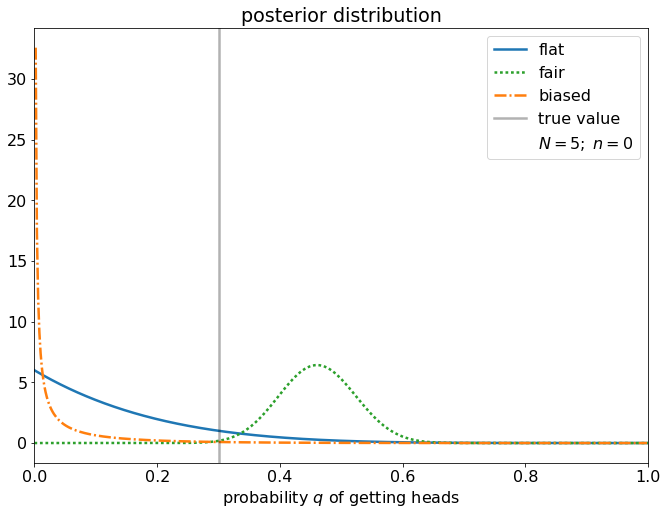

In [8]:
# first 5
fig = plotCoinData(Nh[4], 5, q0);

In [9]:
# first 10
fig = plotCoinData(Nh[9], 10, q0);

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


/local/wenxuan.jia/ipykernel_2210980/2914854089.py:2: RuntimeWarning: invalid value encountered in multiply
  post = lambda x: x**Nhead * (1 - x)**(Ntot - Nhead) * prior(x)


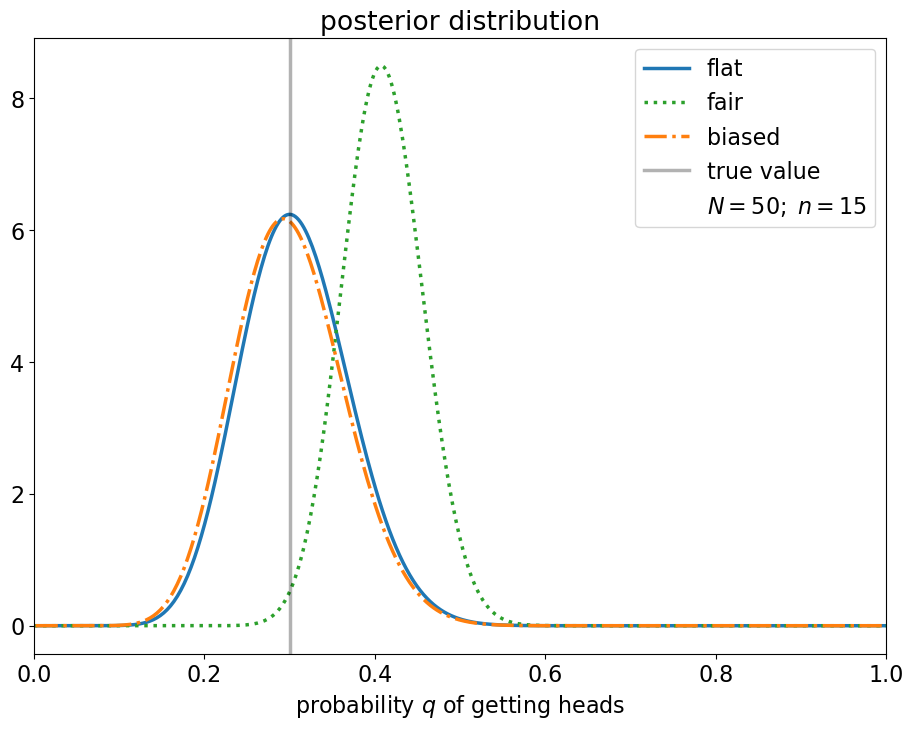

In [8]:
# first 50
fig = plotCoinData(Nh[49], 50, q0);

/local/wenxuan.jia/ipykernel_2210980/2914854089.py:2: RuntimeWarning: invalid value encountered in multiply
  post = lambda x: x**Nhead * (1 - x)**(Ntot - Nhead) * prior(x)


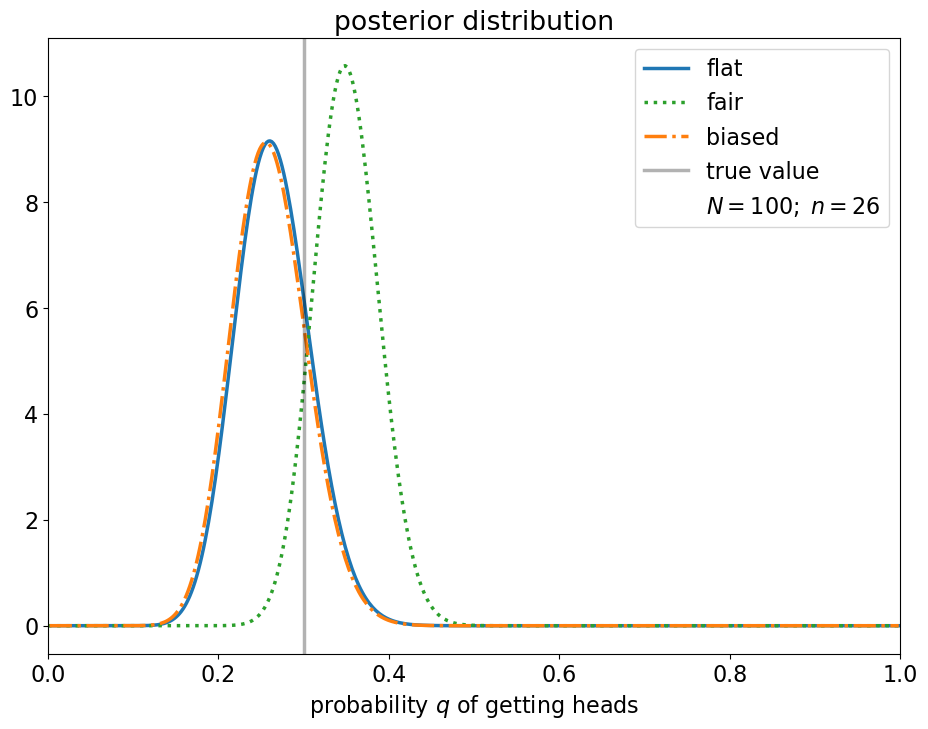

In [9]:
# first 100
fig = plotCoinData(Nh[90], 100, q0);

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in multiply
  from ipykernel import kernelapp as app


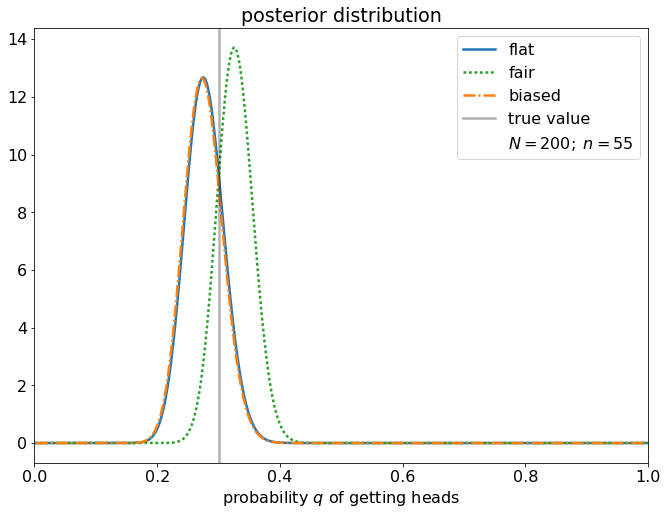

In [12]:
# first 200
fig = plotCoinData(Nh[199], 200, q0);

In [10]:
fig = plotCoinData(Nh[999], 1000, q0);

/local/wenxuan.jia/ipykernel_2210980/2914854089.py:2: RuntimeWarning: invalid value encountered in multiply
  post = lambda x: x**Nhead * (1 - x)**(Ntot - Nhead) * prior(x)


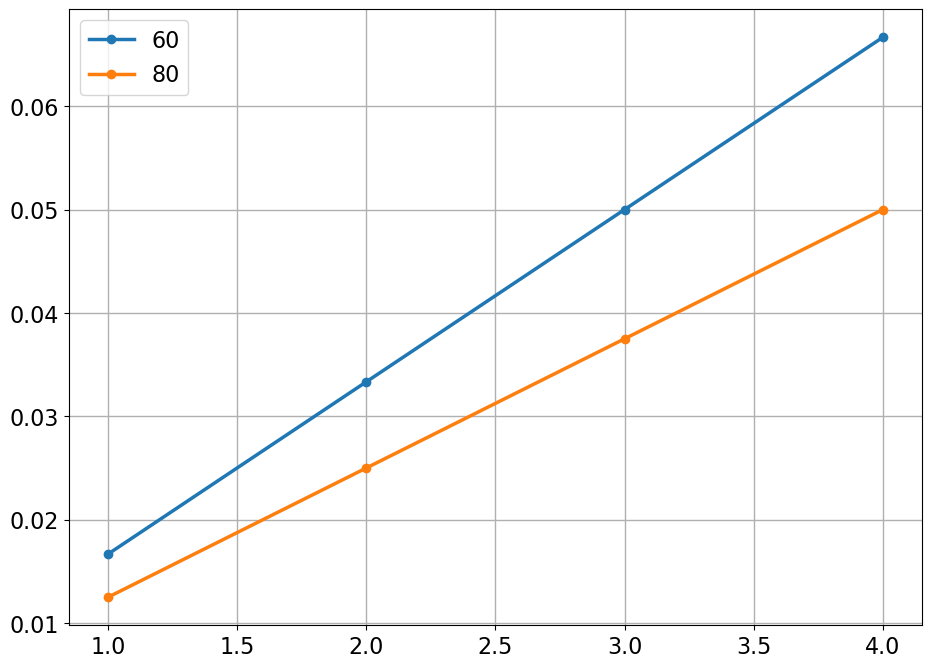

In [25]:
num = np.linspace(1,4,4)
plt.plot(num, num/60, '-o', label='60')
plt.plot(num, num/80, '-o', label='80')
plt.grid()
plt.legend()
plt.show()
